# Pandas Utilities

Methods and code in Pandas that are important for Pandas but not directly related to data processing for data analysis and data science, also advanced Pandas 

## Import Pandas

In [19]:
# Import libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Print versions

In [2]:
# Print the version of pandas that has been imported.
pd.__version__

'1.2.2'

In [3]:
# Print out all the version information of the libraries that are required by the pandas library.
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit           : 7d32926db8f7541c356066dcadabf854487738de
python           : 3.8.5.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.8.0-44-generic
Version          : #50~20.04.1-Ubuntu SMP Wed Feb 10 21:07:30 UTC 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.2.2
numpy            : 1.20.1
pytz             : 2019.3
dateutil         : 2.7.3
pip              : 20.0.2
setuptools       : 45.2.0
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : 2.8.6 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 7.20.0
pandas_datareader: None
bs4              : None
bottlene

## MultiIndex in Pandas

In [4]:
# Given the lists letters = ['A', 'B', 'C'] and numbers = list(range(10)),
#construct a MultiIndex object from the product of the two lists. 
#Use it to index a Series of random numbers. 
letters = ['A', 'B', 'C']
numbers = list(range(5))
mi = pd.MultiIndex.from_product([letters, numbers])
s_2 = pd.Series(np.random.rand(15), index=mi)
s_2

A  0    0.851221
   1    0.391083
   2    0.399289
   3    0.837786
   4    0.543576
B  0    0.911544
   1    0.317345
   2    0.711727
   3    0.620795
   4    0.398628
C  0    0.423896
   1    0.839059
   2    0.993936
   3    0.465206
   4    0.638079
dtype: float64

In [5]:
# To check if a multiIndex lexicographically sorted
#(this is a necessary property for indexing to work correctly with a MultiIndex).
s_2.index.is_lexsorted()

True

In [6]:
# Select the labels 1 and 3 from the second level of the MultiIndexed Series.
s_2.loc[:, [1, 3]]

A  1    0.391083
   3    0.837786
B  1    0.317345
   3    0.620795
C  1    0.839059
   3    0.465206
dtype: float64

In [7]:
# Slice up to label 'B' for the first level and from label 3 onwards for the second level.
s_2.loc[pd.IndexSlice[:'B', 3:]]

A  3    0.837786
   4    0.543576
B  3    0.620795
   4    0.398628
dtype: float64

In [8]:
# Sum the values in s for each label in the first level
s_2.sum(level=0)

A    3.022955
B    2.960039
C    3.360177
dtype: float64

In [9]:
# To unstack the multiIndex
s_2.unstack()

,0,1,2,3,4
A,0.851221,0.391083,0.399289,0.837786,0.543576
B,0.911544,0.317345,0.711727,0.620795,0.398628
C,0.423896,0.839059,0.993936,0.465206,0.638079


In [10]:
# To do a sum with the multiIndex stacked
s_2.sum(level=1)

0    2.186661
1    1.547487
2    2.104952
3    1.923787
4    1.580284
dtype: float64

In [11]:
# To do a sum with the multiIndex unstacked
s_2.unstack().sum(axis=0)

0    2.186661
1    1.547487
2    2.104952
3    1.923787
4    1.580284
dtype: float64

In [12]:
# Exchange the levels of the MultiIndex and lexsort if required
s_3 = s_2.swaplevel(0, 1)
if not s_3.index.is_lexsorted():
    s_3 = s_3.sort_index()
s_3

0  A    0.851221
   B    0.911544
   C    0.423896
1  A    0.391083
   B    0.317345
   C    0.839059
2  A    0.399289
   B    0.711727
   C    0.993936
3  A    0.837786
   B    0.620795
   C    0.465206
4  A    0.543576
   B    0.398628
   C    0.638079
dtype: float64

## Advanced columns operations

In [13]:
# To find the label of the column that contains the second.
# nan for each row
nan = np.nan
df_10 = [[33, nan, nan, 65],
        [nan, nan, 45, 65],
        [35, nan, 56, nan],
        [87, nan, nan, 65],
        [78, nan, 32, nan]]
columns = list('abcd')
df_10 = pd.DataFrame(df_10, columns=columns)
(df_10.isnull().cumsum(axis=1) == 2).idxmax(axis=1)

0    c
1    b
2    d
3    c
4    d
dtype: object

In [14]:
#For each interval of 10 consecutive values in 'A'  
#calculate the sum of the corresponding values in column 'B'.
df_11 = pd.DataFrame(np.random.RandomState(8765).randint(1, 51, size=(50, 2)), columns = ["A", "B"])
df_11.groupby(pd.cut(df_11['A'], np.arange(0, 51, 10)))['B'].sum()

A
(0, 10]     238
(10, 20]    274
(20, 30]    167
(30, 40]    285
(40, 50]    334
Name: B, dtype: int64

In [15]:
#For each value, count the difference back to the previous zero
#(or the start of the Series, whichever is closer). 
#Make this a new column 'Y'.
df_12 = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
izero = np.r_[-1, (df_12 == 0).values.nonzero()[0]]  # indices of zeros
idx = np.arange(len(df_12))
y = df_12['X'] != 0
df_12['Y'] = idx - izero[np.searchsorted(izero - 1, idx) - 1]
df_12

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


In [16]:
#Create a list of the column-row index locations of the 3 largest values in this DataFrame. 
df_13 = pd.DataFrame(np.random.RandomState(30).randint(1, 101, size=(8, 8)))
df_13.unstack().sort_values()[-3:].index.tolist()

[(5, 7), (6, 4), (2, 5)]

## Advanced graphs with Pandas, Numpy and Matplotlib

In [17]:
# Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly
#summaries of the opening, highest, lowest, and closing prices
# Helper function
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)
def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()
# Solving the exercise
df = day_stock_data()
df.set_index("time", inplace = True)
agg = df.resample("H").ohlc()
agg.columns = agg.columns.droplevel()
agg["color"] = (agg.close > agg.open).map({True:"green",False:"red"})
agg.head()

,open,high,low,close,color
time,,,,,
2021-03-01 09:00:00,100.000000,101.153996,99.692007,100.162189,green
2021-03-01 10:00:00,100.213296,102.270111,98.977301,101.716622,green
2021-03-01 11:00:00,101.625158,103.088473,101.182321,101.802799,green
2021-03-01 12:00:00,101.768836,103.604337,100.690380,103.187905,green
2021-03-01 13:00:00,103.141891,105.760589,103.141891,104.325826,green


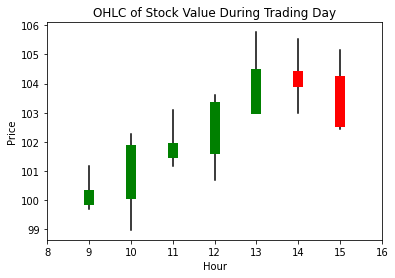

In [18]:
# Plot a candlestick chart
plot_candlestick(agg)